In [1]:
import pandas as pd
import numpy as np

from datetime import datetime
import pandas as pd 

from scipy import optimize
from scipy import integrate

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

import seaborn as sns


sns.set(style="darkgrid")

mpl.rcParams['figure.figsize'] = (16, 9)
pd.set_option('display.max_rows', 20)

from scipy import optimize
from scipy import integrate

data_path = '../data/processed/COVID_relational_confirmed.csv'
df_list = pd.read_csv(data_path)

df_model=pd.crosstab(df_list['date'],df_list['location'],values=df_list['confirmed'],aggfunc=np.mean)
country_list = ['India', 'Germany', 'Italy', 'France', 'Russia']
df_final=df_model[country_list].dropna()
#df_final.tail()
df_final.to_csv('../data/raw/COVID_SIR.csv',index=True)

data_path = '../data/raw/COVID_SIR.csv'
df_analyse = pd.read_csv(data_path)
df_analyse.set_index='index'


# Data set cleaned for Covid-19 modelling

the file COVED_small_flat_table has to be generated via the NOTEBOOK DATA PREPARATION

Goal of the exercise a dynamic dashboard of the last cell in the notebook, where one can select the fit for different countries

Fit of SIR model for Germany cases


In [3]:
# try to parse the dates right at the beginning 
# it works out of the box if the date was stored ISO YYYY-MM-DD format


df_analyse=pd.read_csv('../data/raw/COVID_SIR.csv')  
df_analyse.sort_values('date',ascending=True).tail()

,date,India,Germany,Italy,France,Russia
904,2022-07-23,43888755.0,30331133.0,20608190.0,33475033.0,18254644.0
905,2022-07-24,43905621.0,30331133.0,20660065.0,33475033.0,18262088.0
906,2022-07-25,43920451.0,30476605.0,20684182.0,33604792.0,18268570.0
907,2022-07-26,43938764.0,30598385.0,20772833.0,33692580.0,18274674.0
908,2022-07-27,43959321.0,30702511.0,20837233.0,33751218.0,18283628.0


In [20]:
# set some basic parameters
# beta/gamma is denoted as  'basic reproduction number'

N0=1000000 #max susceptible population
beta=0.4   # infection spread dynamics
gamma=0.1  # recovery rate


# condition I0+S0+R0=N0
I0=df_analyse.Germany[35]
S0=N0-I0
R0=0

In [21]:
def SIR_model(SIR,beta,gamma):
    ''' Simple SIR model
        S: susceptible population
        I: infected people
        R: recovered people
        beta: 
        
        overall condition is that the sum of changes (differnces) sum up to 0
        dS+dI+dR=0
        S+I+R= N (constant size of population)
    
    '''
    
    S,I,R=SIR
    dS_dt=-beta*S*I/N0          #S*I is the 
    dI_dt=beta*S*I/N0-gamma*I
    dR_dt=gamma*I
    return([dS_dt,dI_dt,dR_dt])


# Simulative approach to calculate SIR curves

In [22]:

SIR=np.array([S0,I0,R0])
propagation_rates=pd.DataFrame(columns={'susceptible':S0,
                                        'infected':I0,
                                        'recoverd':R0})



for each_t in np.arange(100):
   
    new_delta_vec=SIR_model(SIR,beta,gamma)
   
    SIR=SIR+new_delta_vec
    
    propagation_rates=propagation_rates.append({'susceptible':SIR[0],
                                                'infected':SIR[1],
                                                'recovered':SIR[2]}, ignore_index=True)


C:\Users\uie72584\AppData\Local\Temp\ipykernel_2972\3919566462.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  propagation_rates=propagation_rates.append({'susceptible':SIR[0],
C:\Users\uie72584\AppData\Local\Temp\ipykernel_2972\3919566462.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  propagation_rates=propagation_rates.append({'susceptible':SIR[0],
C:\Users\uie72584\AppData\Local\Temp\ipykernel_2972\3919566462.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  propagation_rates=propagation_rates.append({'susceptible':SIR[0],
C:\Users\uie72584\AppData\Local\Temp\ipykernel_2972\3919566462.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.

C:\Users\uie72584\AppData\Local\Temp\ipykernel_2972\3919566462.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  propagation_rates=propagation_rates.append({'susceptible':SIR[0],
C:\Users\uie72584\AppData\Local\Temp\ipykernel_2972\3919566462.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  propagation_rates=propagation_rates.append({'susceptible':SIR[0],
C:\Users\uie72584\AppData\Local\Temp\ipykernel_2972\3919566462.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  propagation_rates=propagation_rates.append({'susceptible':SIR[0],
C:\Users\uie72584\AppData\Local\Temp\ipykernel_2972\3919566462.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.

C:\Users\uie72584\AppData\Local\Temp\ipykernel_2972\3919566462.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  propagation_rates=propagation_rates.append({'susceptible':SIR[0],
C:\Users\uie72584\AppData\Local\Temp\ipykernel_2972\3919566462.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  propagation_rates=propagation_rates.append({'susceptible':SIR[0],
C:\Users\uie72584\AppData\Local\Temp\ipykernel_2972\3919566462.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  propagation_rates=propagation_rates.append({'susceptible':SIR[0],
C:\Users\uie72584\AppData\Local\Temp\ipykernel_2972\3919566462.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.

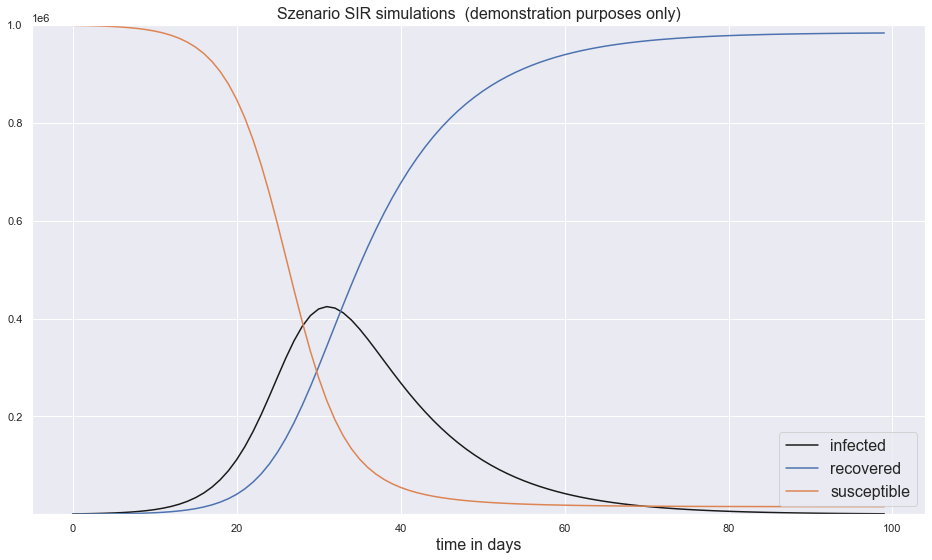

In [23]:
fig, ax1 = plt.subplots(1, 1)

ax1.plot(propagation_rates.index,propagation_rates.infected,label='infected',color='k')
ax1.plot(propagation_rates.index,propagation_rates.recovered,label='recovered')
ax1.plot(propagation_rates.index,propagation_rates.susceptible,label='susceptible')

ax1.set_ylim(10, 1000000)
ax1.set_yscale('linear')
ax1.set_title('Szenario SIR simulations  (demonstration purposes only)',size=16)
ax1.set_xlabel('time in days',size=16)
ax1.legend(loc='best',
           prop={'size': 16});

# Fitting the parameters of SIR model

In [24]:


ydata = np.array(df_analyse.Germany[35:])
t=np.arange(len(ydata))
#df_analyse.Germany[:]

In [25]:
# ensure re-initialization 
I0=ydata[0]
S0=N0-I0
R0=0
beta

0.4

In [2]:
def SIR_model_t(SIR,t,beta,gamma):
    ''' Simple SIR model
        S: susceptible population
        t: time step, mandatory for integral.odeint
        I: infected people
        R: recovered people
        beta: 
        
        overall condition is that the sum of changes (differnces) sum up to 0
        dS+dI+dR=0
        S+I+R= N (constant size of population)
    
    '''
    
    S,I,R=SIR
    dS_dt=-beta*S*I/N0          #S*I is the 
    dI_dt=beta*S*I/N0-gamma*I
    dR_dt=gamma*I
    return dS_dt,dI_dt,dR_dt

In [3]:


def fit_odeint(x, beta, gamma):
    '''
    helper function for the integration
    '''
    return integrate.odeint(SIR_model_t, (S0, I0, R0), t, args=(beta, gamma))[:,1] # we only would like to get dI



In [28]:
# example curve of our differential equationa
popt=[0.4,0.1]
fit_odeint(t, *popt)

array([ 5.34000000e+02,  7.20636565e+02,  9.72390987e+02,  1.31189041e+03,
        1.76954861e+03,  2.38618347e+03,  3.21646363e+03,  4.33340467e+03,
        5.83415897e+03,  7.84733318e+03,  1.05419873e+04,  1.41382494e+04,
        1.89190120e+04,  2.52413011e+04,  3.35444213e+04,  4.43497203e+04,
        5.82438412e+04,  7.58343354e+04,  9.76654592e+04,  1.24086512e+05,
        1.55079783e+05,  1.90081931e+05,  2.27863953e+05,  2.66549354e+05,
        3.03821489e+05,  3.37294350e+05,  3.64934865e+05,  3.85390674e+05,
        3.98124223e+05,  4.03346973e+05,  4.01822859e+05,  3.94631900e+05,
        3.82962438e+05,  3.67963316e+05,  3.50657909e+05,  3.31906938e+05,
        3.12403498e+05,  2.92686158e+05,  2.73160158e+05,  2.54120604e+05,
        2.35774375e+05,  2.18259294e+05,  2.01660129e+05,  1.86021562e+05,
        1.71358480e+05,  1.57664018e+05,  1.44915778e+05,  1.33080596e+05,
        1.22118158e+05,  1.11983729e+05,  1.02630189e+05,  9.40095397e+04,
        8.60739999e+04,  

In [12]:
# the resulting curve has to be fitted
# free parameters are here beta and gamma

In [29]:
popt, pcov = optimize.curve_fit(fit_odeint, t, ydata)
perr = np.sqrt(np.diag(pcov))
    
print('standard deviation errors : ',str(perr), ' start infect:',ydata[0])
print("Optimal parameters: beta =", popt[0], " and gamma = ", popt[1])



C:\Users\uie72584\AppData\Local\Temp\ipykernel_2972\649699423.py:16: RuntimeWarning: overflow encountered in double_scalars
  dS_dt=-beta*S*I/N0          #S*I is the
C:\Users\uie72584\AppData\Local\Temp\ipykernel_2972\649699423.py:17: RuntimeWarning: overflow encountered in double_scalars
  dI_dt=beta*S*I/N0-gamma*I
C:\Users\uie72584\AppData\Local\Temp\ipykernel_2972\649699423.py:18: RuntimeWarning: overflow encountered in double_scalars
  dR_dt=gamma*I
C:\ProgramData\Anaconda3\lib\site-packages\scipy\integrate\odepack.py:247: ODEintWarning: Illegal input detected (internal error). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)


standard deviation errors :  [1.69827010e-04 1.90502106e-05]  start infect: 534.0
Optimal parameters: beta = 0.019528044479970016  and gamma =  -0.00605412529104622


In [30]:
# get the final fitted curve
fitted=fit_odeint(t, *popt)

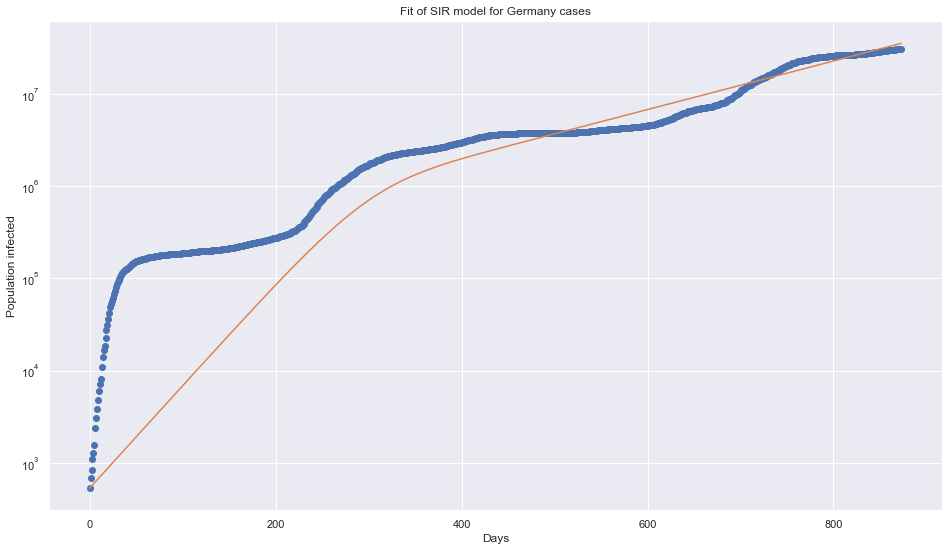

Optimal parameters: beta = 0.019528044479970016  and gamma =  -0.00605412529104622
Basic Reproduction Number R0  -3.2255765352017276
This ratio is derived as the expected number of new infections (these new infections are sometimes called secondary infections from a single infection in a population where all subjects are susceptible. @wiki


In [15]:
plt.semilogy(t, ydata, 'o')
plt.semilogy(t, fitted)
plt.title("Fit of SIR model for Germany cases")
plt.ylabel("Population infected")
plt.xlabel("Days")
plt.show()
print("Optimal parameters: beta =", popt[0], " and gamma = ", popt[1])
print("Basic Reproduction Number R0 " , popt[0]/ popt[1])
print("This ratio is derived as the expected number of new infections (these new infections are sometimes called secondary infections from a single infection in a population where all subjects are susceptible. @wiki")

In [4]:
# set some basic parameters
# beta/gamma is denoted as  'basic reproduction number'
country_list = [ 'Germany', 'Italy', 'France', 'India','Russia']
N0=1000000 #max susceptible population
beta=0.4   # infection spread dynamics
gamma=0.1  # recovery rate

df_list=pd.read_csv('../data/raw/COVID_SIR.csv')

df_data=df_list[30:130]
t=np.arange(df_data.shape[0])

R0=0

#df_data = df_data.drop(['date'],axis=1).diff().fillna(0)

for country in country_list:
    y_data=np.array(df_data[country])#[df_data[country]>0][country])
    t=np.arange(len(y_data))
    
    I0=y_data[0]
    S0=N0-I0
    popt=[0.4,0.1]
    fit_odeint(t,*popt)
    popt,pcov = optimize.curve_fit(fit_odeint,t,y_data,maxfev=5000)
    perr= np.sqrt(np.diag(pcov))
    fitted=fit_odeint(t,*popt)
    fitted_pad= np.concatenate((np.zeros(df_data.shape[0]-len(fitted)),fitted))
    df_data[country+'_fitted']=fitted_pad


df_data=df_data.reset_index(drop=True)
df_data.to_csv('../data/processed/SIR_fitted_curve.csv')


C:\ProgramData\Anaconda3\lib\site-packages\scipy\integrate\odepack.py:247: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)
C:\Users\uie72584\AppData\Local\Temp\ipykernel_16040\4294738751.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_data[country+'_fitted']=fitted_pad
C:\Users\uie72584\AppData\Local\Temp\ipykernel_16040\4294738751.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-

In [15]:
import seaborn as sns
import dash
from dash import dcc
from dash import html
from dash.dependencies import Input, Output,State
import plotly.graph_objects as go

fig = go.Figure()
app = dash.Dash()
app.layout = html.Div([

    dcc.Markdown('''
    #  SIR Model Dashboard
    * The first plot shows the new cases with time.
    * The second plot shows the SIR Model 
    
    '''),

    dcc.Markdown('''
    ## Select Country
    '''),
    dcc.Dropdown(
        id='country_drop_down',
        options=[ {'label': each,'value':each} for each in country_list],
        value=['Germany','India', 'Italy'], # which are pre-selected
        multi=True),
    dcc.Graph(figure=fig, id='main_window_slope')])


@app.callback(
    Output('main_window_slope', 'figure'),
    [Input('country_drop_down', 'value')])
def update_figure(country_list):
    v = 0
    my_yaxis={'type':"log",'title':'Confirmed'}
    traces = []
    for each in country_list:
        traces.append(dict(x=df_data['date'],y=df_data[each][1:],
                                mode='line',name=each))
        traces.append(dict(x=df_data['date'],
                                y=df_data[each+'_fitted'][2:],
                                mode='lines+markers',name=each+'_simulated'))

        v = v+1
    return {
            'data': traces,
            'layout': dict (
                width=1280,height=720,
                xaxis={'title':'Time','tickangle':-45,'nticks':20,
                'tickfont':dict(size=14,color="#0c6887"),},yaxis=my_yaxis)}

if __name__ == '__main__':
    app.run_server(debug=True, use_reloader=False)

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: on


In [9]:
df_data

,date,India,Germany,Italy,France,Russia,Germany_fitted,Italy_fitted,France_fitted,India_fitted,Russia_fitted
0,2020-03-01,3.0,117.0,1694.0,130.0,2.0,117.000000,1694.000000,130.000000,3.000000,2.000000
1,2020-03-02,5.0,150.0,2036.0,191.0,3.0,133.179209,1868.038358,147.932279,3.436585,2.357112
2,2020-03-03,5.0,188.0,2502.0,212.0,3.0,151.594781,2059.866281,168.337010,3.936704,2.777989
3,2020-03-04,28.0,240.0,3089.0,288.0,3.0,172.555550,2271.282546,191.554751,4.509604,3.274015
4,2020-03-05,30.0,349.0,3858.0,426.0,4.0,196.412918,2504.263594,217.972872,5.165876,3.858610
...,...,...,...,...,...,...,...,...,...,...,...
95,2020-06-04,226713.0,182764.0,234013.0,191788.0,440538.0,111616.545973,171297.000566,117756.963665,227537.780684,399617.699792
96,2020-06-05,236184.0,183271.0,234531.0,192369.0,449256.0,105986.855902,165891.545263,111969.463221,228558.675530,390448.794130
97,2020-06-06,246622.0,183678.0,234801.0,192941.0,458102.0,100556.640782,160561.367707,106380.883055,228453.439044,380717.232893
98,2020-06-07,257486.0,183979.0,234998.0,193282.0,467073.0,95330.355282,155315.440892,100995.876727,227281.122189,370552.468759
